# Chess Predictor
**Authors:** Matthew Ardizzone (@Mattizzone on GitHub), Adam Cogdell (@BlaziusMaximus on GitHub), Michael York (@mryork on GitHub)

There already exists technologies like StockFish, which require seconds in order to determine who is ahead or behind in a chess game. For our final project in COMP 562, Introduction to Machine Learning, we decided to test to see if we can predict the winner of a chess game simply based on the first `x` moves in a game. Using a Support Vector Machine, we are able to accurately predict `x` games out of a sample size of ____.

775746
1: 0.5224222585924714
2: 0.5319148936170213
3: 0.5188216039279869
4: 0.5250409165302782
5: 0.5155482815057283
6: 0.5109656301145663
7: 0.5109656301145663
8: 0.5037643207855974
9: 0.5044189852700491
10: 0.5096563011456628
11: 0.49361702127659574
12: 0.49852700490998364
13: 0.5119476268412438
14: 0.5099836333878887
15: 0.511620294599018
16: 0.5158756137479542
17: 0.5070376432078559
18: 0.5050736497545009
19: 0.5099836333878887
20: 0.5132569558101473
21: 0.5126022913256956
22: 0.5106382978723404
23: 0.5188216039279869
24: 0.5168576104746317
25: 0.5201309328968904
26: 0.5247135842880524
27: 0.532569558101473
28: 0.5355155482815057
29: 0.5436988543371523
30: 0.5518821603927987
31: 0.5541734860883797
32: 0.5538461538461539
33: 0.5440261865793781
34: 0.5538461538461539
35: 0.5623567921440262
36: 0.5659574468085107
37: 0.5620294599018003
38: 0.565302782324059
39: 0.5711947626841244
40: 0.5685761047463175
41: 0.5810147299509002
42: 0.5911620294599018
43: 0.5839607201309329
44: 0.58690671

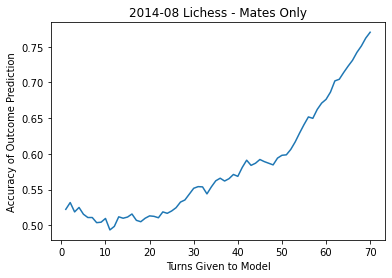

In [4]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm, linear_model
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from progressbar import ProgressBar


import matplotlib.pyplot as plt

xAxis = []
yAxis = []

#for i in range(1,26):
    # Load Data from CSV, randomize, and separate for fit and testing

X = [] # Moves
Y = [] # Outcomes

seed = 12345

with open('./lichess_201408_matesonly_1000000.csv','r') as f:
    lines = csv.reader(f)
    lines = list(lines)
    print(len(lines))
    i = 0
    for line in lines:
        if i > 1000000:
            break;
        if int(line[1]) == 2:
            continue
        if int(line[2]) <= 140:
            continue
        
        splitter = line[0].split(' ')
        while '' in splitter:
            splitter.remove('')
        moves = list(map(int, splitter))
        winner = int(line[1])
        moves = np.array(moves)
        X.append(moves)
        Y.append(winner) # Pick winner or length as a Y
        i = i + 1
        
        
    for i in range(1,71):
        localX = X.copy()
        maxMoves = i*2
        for j in range(len(localX)):
            localX[j] = localX[j][0:maxMoves]
                
        X_train, X_test, y_train, y_test = train_test_split(localX, Y, test_size=0.25, random_state=seed)

        #clf = MLPClassifier(learning_rate_init=0.001, max_iter=1000, learning_rate='adaptive', solver='adam')
        #clf = svm.SVC(decision_function_shape='ovo')
        #clf = linear_model.LinearRegression()
        clf = AdaBoostClassifier()
        clf.fit(X_train, y_train)

        prediction = clf.predict(X_test)

        print(str(i) + ": " + str(accuracy_score(y_test, prediction)))
        xAxis.append(i)
        yAxis.append(accuracy_score(y_test, prediction))

        """pr = clf.decision_function(X_test);

        print(pr[0]);"""

    plt.plot(xAxis,yAxis)
    plt.title('2014-08 Lichess - Mates Only')
    plt.xlabel('Turns Given to Model')
    plt.ylabel('Accuracy of Outcome Prediction')
    plt.show()